In [4]:
import torch

In [2]:
from character_detection import RPN, inference_simple, show_image

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model_detection = RPN(dropout_rate=0.4, device=device).to(device)
checkpoint = torch.load('character_detection/models/checkpoints_v5/model_epoch_40.pth')
model_detection.load_state_dict(checkpoint['model_state_dict'])

/tmp/ipykernel_44576/3334811256.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('character_detection/models/checkpoints_v5/model_epoch_40.pth')


<All keys matched successfully>

In [5]:
image_path = 'datasets/dataset_v5/98.jpg'

In [6]:
boxes, scores = inference_simple(model_detection, image_path, device)

Raw proposals shape: torch.Size([1, 980, 4])
Objectness logits shape: torch.Size([1, 980, 2])
Max objectness score: 38.42792510986328
Min objectness score: -33.47733688354492
After softmax, max score: 0.9999992847442627
Number of proposals after confidence thresholding: 343
Filtered boxes shape: torch.Size([343, 4])
Filtered scores shape: torch.Size([343])
Number of boxes after NMS: 6


/home/vedo/miniconda3/envs/captcha/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


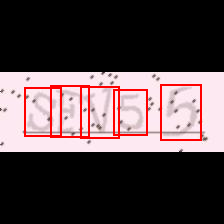

In [7]:
target = boxes.tolist()
show_image(image_path, target)

In [8]:
target

[[113.59246826171875,
  89.59864044189453,
  147.92080688476562,
  135.9779052734375],
 [160.76536560058594,
  84.85397338867188,
  201.14320373535156,
  140.4246368408203],
 [80.91911315917969,
  86.32781219482422,
  119.13194274902344,
  138.05697631835938],
 [50.383880615234375, 85.55271911621094, 89.24508666992188, 137.640869140625],
 [24.29803466796875, 87.38428497314453, 61.33882141113281, 136.07997131347656]]

In [1]:
from character_recognition import CaptchaCharClassifier

In [8]:
model_recognition = CaptchaCharClassifier(dropout_rate=0.4, device=device).to(device)
checkpoint = torch.load('character_recognition/models/checkpoints_v5/model_epoch_40.pth')
model_recognition.load_state_dict(checkpoint['model_state_dict'])

/tmp/ipykernel_52287/3994308567.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('character_recognition/models/checkpoints_v5/model_epoch_40.pth')

<All keys matched successfully>

In [9]:
bb_path = 'datasets/dataset_v5/98.txt'
bbs = []
c_s = []
with open(bb_path, 'r') as f:
    for line in f.readlines():
        data = line.strip().split(' ')
        class_char = data[0] # not used
        x_min, y_min, x_max, y_max = float(data[1]), float(data[2]), float(data[3]), float(data[4])
        c_s.append(class_char)
        bbs.append((x_min, y_min, x_max, y_max))

In [10]:
bbs

[(24.0, 15.0, 61.0, 65.0),
 (50.0, 15.0, 87.0, 64.0),
 (80.0, 13.0, 121.0, 67.0),
 (114.0, 19.0, 146.0, 61.0),
 (160.0, 12.0, 201.0, 67.0)]